In [1]:
from matplotlib import pyplot as plt
import torchvision
import torch
import numpy as np

In [2]:
import sys
sys.path.append('../')  # Add the root folder to the sys.path

from config import *
from dataloaders.video_custom_dataloader import video_custom_dataloader

# Reload the configuration
from importlib import reload
reload(sys.modules['config']) 

from config import *

In [3]:
custom_dataloader = video_custom_dataloader(csv_original_files="../"+VIDEO_METADATA_CSV,
                                   csv_frames_files="../"+VIDEO_METADATA_FRAMES_CSV,
                                   batch_size=BATCH_SIZE,
                                   frames_dir="../"+FRAMES_FILES_DIR,
                                   seed=RANDOM_SEED,
                                   limit=LIMIT,
                                   use_positive_negative_labels=USE_POSITIVE_NEGATIVE_LABELS,
                                   preload_frames=PRELOAD_FRAMES,
                                   apply_transformations=APPLY_TRANSFORMATIONS,
                                   balance_dataset=BALANCE_DATASET,
                                   normalize=NORMALIZE,
                                   )

--Dataloader-- Splitting the dataset WITH overlapping between subjects
--- Train subjects: [20  5 17 21  6 23 10 22  3  7 18  8  0  4 19 12 11  2 15  1  9 13 14 16] 
--- Validation subjects: [19 23  7  3 21  0  2 18  6  4  5 10  9  1 16 22 12 14 11  8 20 17 15 13] 
--- Test subjects: [ 9 21  2 22  6  4 19 23  8 12 17 20 16  1 10  7 13 11 18  3 15 14  0  5]
--Dataloader-- Using positive/negative labels mapping.
--- Train emotions: [0 1 2] 
--- Validation emotions: [0 1 2] 
--- Test emotions: [0 1 2]


c:\Users\danil\Documents\Repositories\MI\utils\..\dataloaders\video_custom_dataloader.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train_df['emotion'] = self.train_df['emotion'].astype(int).map(mapping_to_positive_negative)
c:\Users\danil\Documents\Repositories\MI\utils\..\dataloaders\video_custom_dataloader.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.val_df['emotion'] = self.val_df['emotion'].astype(int).map(mapping_to_positive_negative)
c:\Users\danil\Documents\Repositories\MI

In [4]:
train_loader = custom_dataloader.get_train_dataloader()
val_loader = custom_dataloader.get_val_dataloader()
test_loader = custom_dataloader.get_test_dataloader()

c:\Users\danil\Documents\Repositories\MI\utils\..\datasets\video_custom_dataset.py:116: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna({"balanced": False}, inplace=True)


--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- Classes before balancing:  {2: 18844, 1: 8899, 0: 7023}
--Data Balance-- The most common class is 2 with 18844 images.
--Data Balance (Oversampling)-- Adding 11821 to 0 class..
--Data Balance (Oversampling)-- Adding 9945 to 1 class..
--Data Balance-- Classes after balancing:  {0: 18844, 1: 18844, 2: 18844}
--Data Preloading-- Preloading frames files.


100%|██████████| 56532/56532 [01:32<00:00, 610.64it/s]


--Dataset-- Train dataset size: 56532
--Data Preloading-- Preloading frames files.


100%|██████████| 4347/4347 [00:08<00:00, 490.11it/s]


--Dataset-- Validation dataset size: 4347
--Data Preloading-- Preloading frames files.


100%|██████████| 4361/4361 [00:08<00:00, 492.32it/s]

--Dataset-- Test dataset size: 4361


In [17]:
from shared.constants import merged_emotion_mapping

def plot_image_grid(frames: torch.Tensor, labels: torch.Tensor,title=None):
    # Convert from tensor to image format
    frames = frames.numpy()
    labels = labels.numpy() 

    # Choose 10 random images to display from the batch with their corresponding labels
    mapped_labels = [merged_emotion_mapping[label.item()] for label in labels]    

    fig, axs = plt.subplots(2, 5, figsize=(20, 10))
    fig.suptitle(title)

    for i in range(2):
        for j in range(5):
            axs[i, j].imshow(frames[5*i+j].transpose(1, 2, 0))
            axs[i, j].set_title(mapped_labels[5*i+j])
            axs[i, j].axis('off')
    plt.show()
    

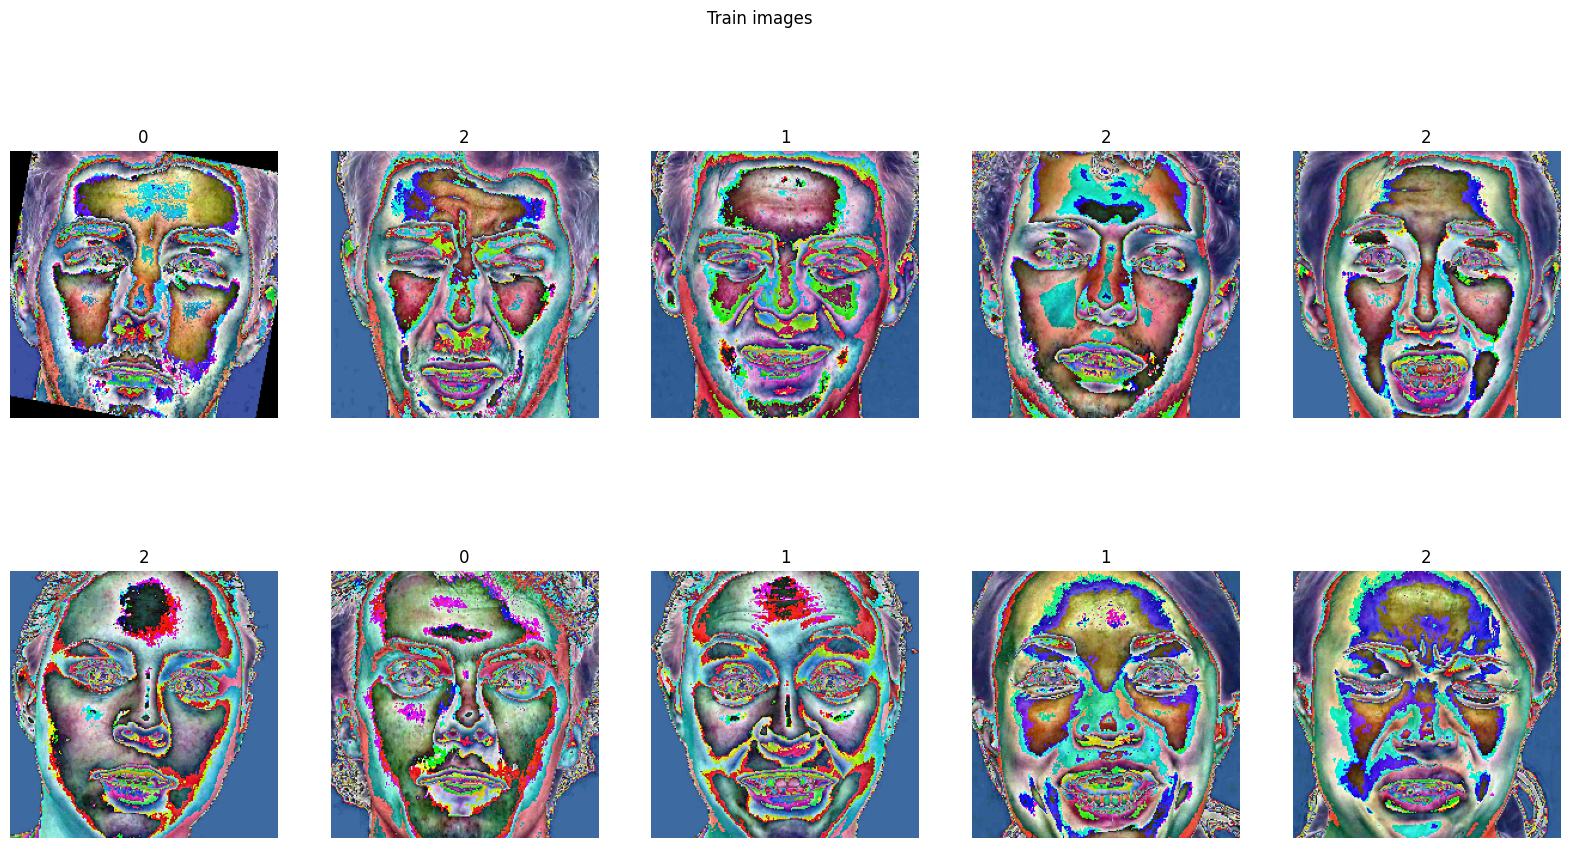

In [18]:
_, batch = next(enumerate(train_loader))
frames, labels = batch['frame'], batch['emotion']
plot_image_grid(frames, labels,"Train images")

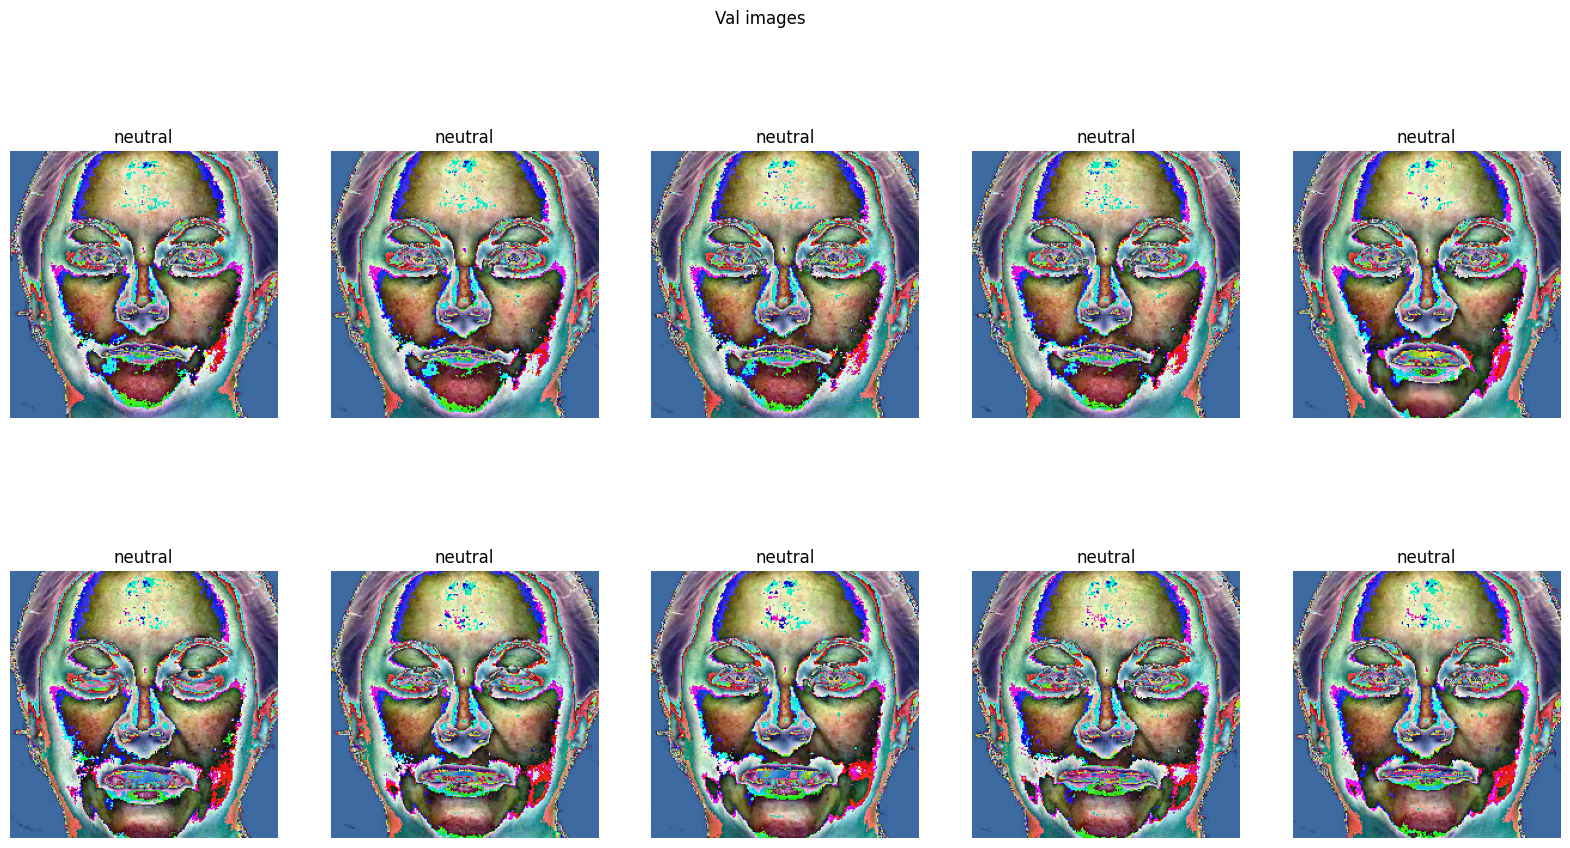

In [13]:
_, batch = next(enumerate(val_loader))
frames, labels = batch['frame'], batch['emotion']
plot_image_grid(frames, labels,"Val images")

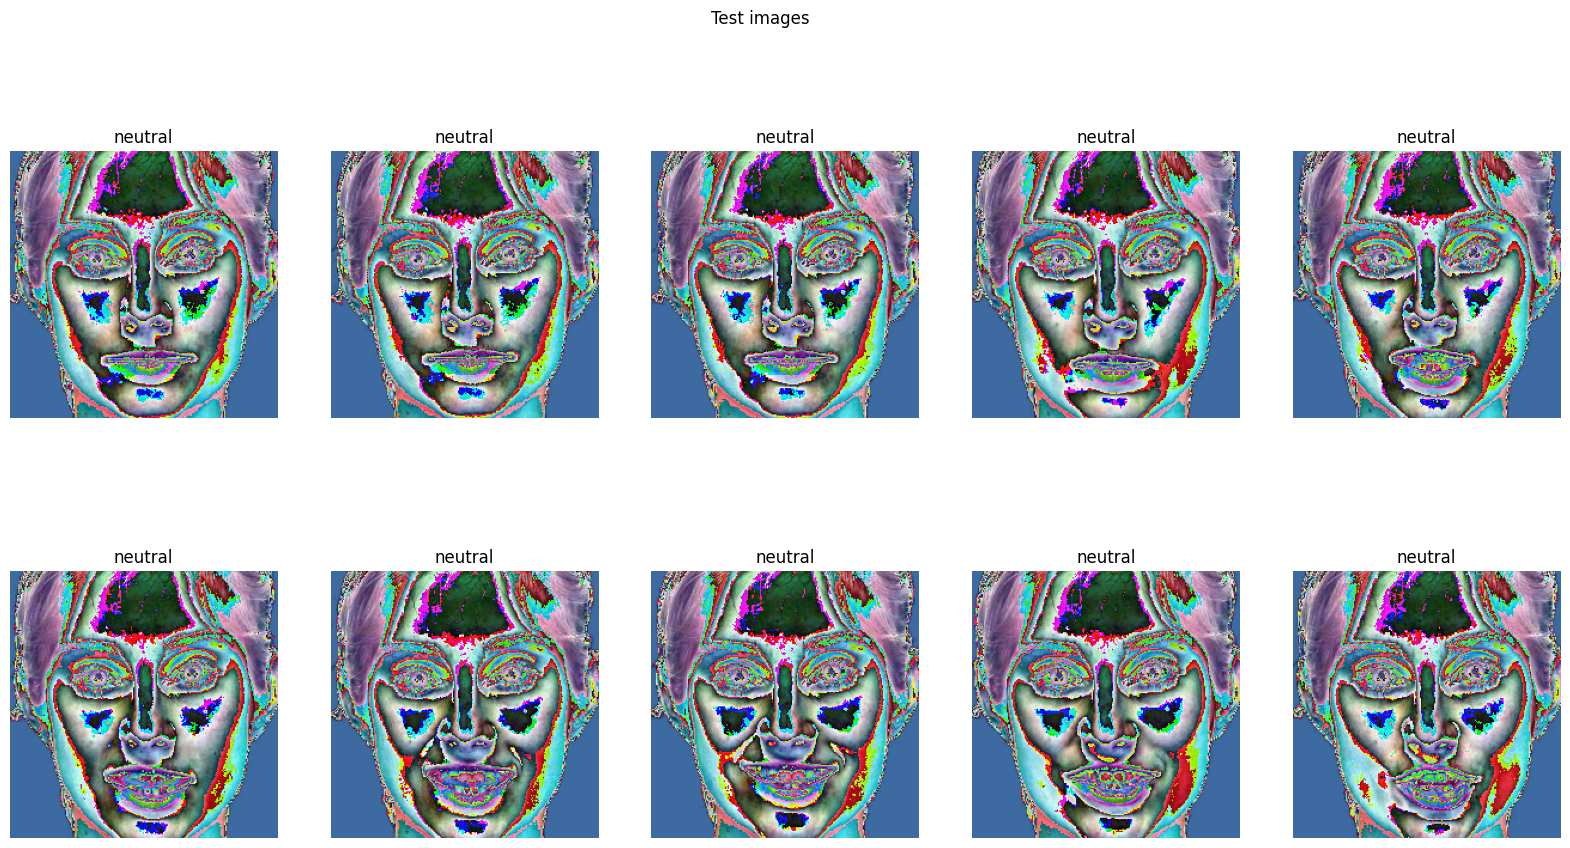

In [14]:
_, batch = next(enumerate(test_loader))
frames, labels = batch['frame'], batch['emotion']
plot_image_grid(frames, labels,"Test images")